In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


# Pandas Printing Options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set_style('white')

# LOAD 

In [2]:
# FOR THE HEATMAP, WE'LL JUST USE JAN 2013 - DEC 2016 TO KEEP IT SIMPLE
injuries = pd.read_csv("../data/injuries_2013_2016.csv", index_col=['DATE'], parse_dates=['DATE'])

# INSPECT

In [3]:
injuries.head()

,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,COLLISION
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-09 18:31:00,18:31,BRONX,10466.000,40.892,-73.858,"(40.89204, -73.85814)",EAST 231 STREET,WHITE PLAINS ROAD,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3618743,PICK-UP TRUCK,NaN,NaN,NaN,NaN,1
2016-05-08 13:35:00,13:35,MANHATTAN,10024.000,40.783,-73.975,"(40.7826298, -73.9749835)",COLUMBUS AVENUE,WEST 80 STREET,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3437482,NaN,NaN,NaN,NaN,NaN,1
2016-04-26 09:00:00,9:00,QUEENS,11415.000,40.704,-73.834,"(40.7041498, -73.8337141)",118 STREET,84 AVENUE,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3422600,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1
2016-11-16 07:11:00,7:11,NaN,nan,nan,nan,NaN,ALLERTON AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3563066,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1
2016-04-25 18:38:00,18:38,BROOKLYN,11212.000,40.664,-73.922,"(40.663843, -73.9216562)",BLAKE AVENUE,EAST 98 STREET,NaN,1,0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3418528,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1


# PLOT HOUR BY DAYOFWEEK

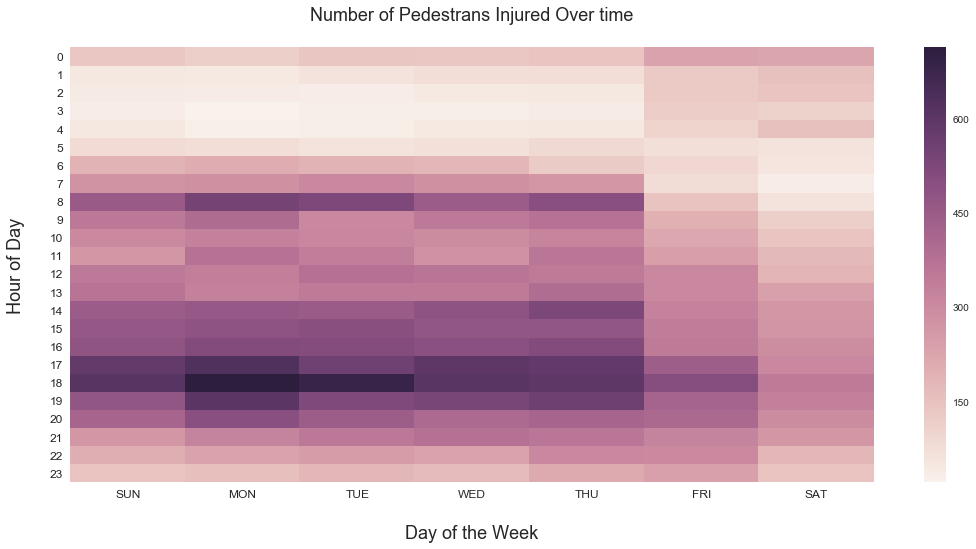

In [4]:
plt.figure(figsize=(18, 8))
dayofweek = injuries.groupby([injuries.index.dayofweek, injuries.index.hour])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack().T
sns.heatmap(dayofweek)
plt.xticks(np.arange(7) + .5, ('SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'))
plt.yticks(rotation=0)
plt.ylabel('Hour of Day\n', size=18)
plt.xlabel('\nDay of the Week', size=18)
plt.yticks(rotation=0, size=12)
plt.xticks(rotation=0, size=12)
plt.title("Number of Pedestrans Injured Over time\n", size=18, );

In [5]:
dayofweek

,0,1,2,3,4,5,6
0,136,115,140,138,143,233,229
1,47,46,62,75,74,132,152
2,41,39,34,45,50,129,144
3,34,22,31,32,40,120,110
4,50,30,32,46,47,104,154
5,84,78,64,68,89,72,63
6,191,208,190,180,127,93,57
7,276,286,308,286,267,80,37
8,455,543,523,449,496,147,65
9,356,396,309,353,375,196,114


# PLOT HOUR BY WEEK OF YEAR

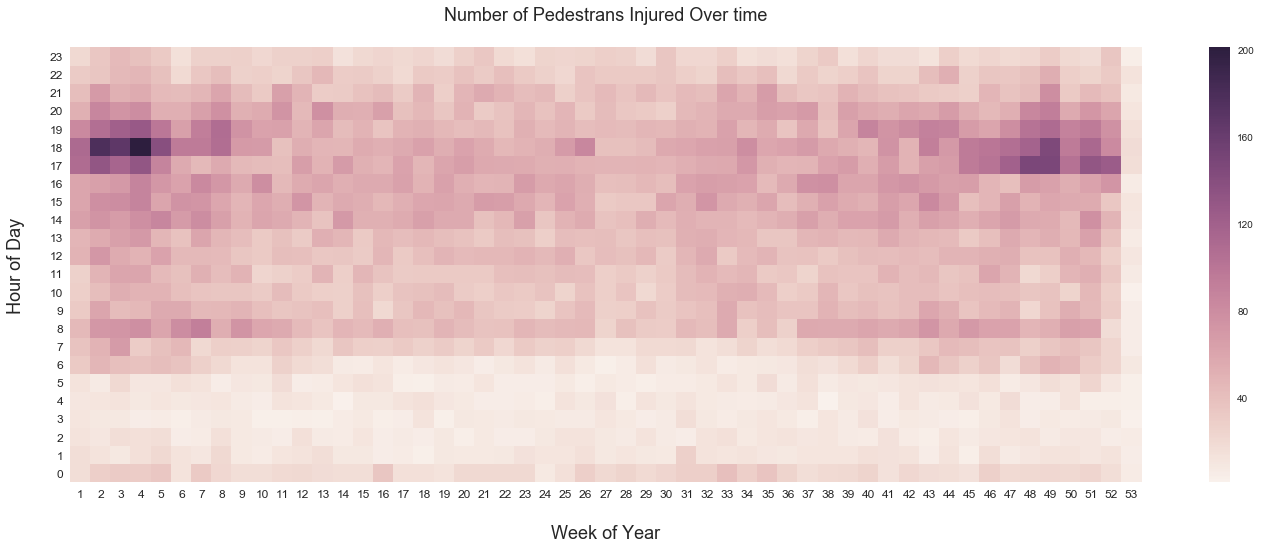

In [6]:
plt.figure(figsize=(24, 8))
hour_by_year = injuries.groupby([injuries.index.weekofyear, injuries.index.hour])['NUMBER OF PEDESTRIANS INJURED'].sum().unstack().T
hour_by_year = hour_by_year.iloc[::-1]
sns.heatmap(hour_by_year)
plt.ylabel('Hour of Day\n', size=18)
plt.xlabel('\nWeek of Year', size=18)
plt.yticks(rotation=0, size=12)
plt.xticks(rotation=0, size=12)
plt.title("Number of Pedestrans Injured Over time\n", size=18, );

In [7]:
hour_by_year

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
23,20,34,44,39,32,15,26,26,27,22,26,26,28,14,21,23,20,23,18,27,34,19,15,24,23,24,28,26,18,35,22,22,28,15,18,15,24,33,15,23,18,18,13,28,19,23,19,22,30,21,18,35,4
22,31,35,45,47,39,19,34,41,26,28,25,35,46,30,31,26,19,33,30,38,31,40,33,26,22,36,32,32,33,35,28,25,41,34,40,21,32,25,28,36,24,24,41,53,26,35,34,39,54,29,24,33,12
21,41,69,51,55,44,43,47,61,43,33,65,49,30,31,38,43,31,49,28,48,57,50,42,45,27,36,44,36,45,36,44,41,60,50,67,41,34,36,50,43,38,36,33,30,27,48,37,43,79,33,44,38,8
20,51,86,74,80,52,53,65,77,51,55,74,45,77,54,53,64,39,46,35,50,31,37,47,38,48,32,43,34,33,27,45,49,57,56,66,63,69,40,65,58,54,60,58,67,54,45,53,85,93,56,72,60,11
19,83,106,121,128,98,65,93,108,75,62,63,49,60,43,50,36,50,51,46,42,45,38,51,44,49,42,44,43,47,46,51,50,63,47,55,36,58,38,61,87,74,81,90,87,67,60,79,102,110,89,95,76,15
18,111,178,168,201,140,95,95,107,69,68,39,54,48,47,55,52,56,63,54,62,55,46,50,54,68,85,39,39,43,58,59,63,65,79,59,62,68,58,51,47,75,50,92,70,96,99,106,118,146,95,113,82,18
17,109,132,116,131,87,56,45,57,45,43,41,66,50,68,51,48,62,47,60,66,58,57,55,51,52,50,49,49,50,48,52,56,58,71,51,48,49,62,67,52,67,50,65,67,96,101,119,148,148,103,132,125,17
16,61,64,70,87,71,62,83,71,57,79,45,55,60,52,57,56,63,50,63,53,48,49,67,58,61,54,40,41,46,41,62,66,64,62,44,57,76,78,61,61,71,75,69,64,66,48,40,67,63,54,62,73,6
15,60,78,80,88,61,75,73,59,48,59,54,73,49,57,54,46,52,59,60,57,67,66,58,48,62,53,32,34,34,60,54,73,57,51,61,42,51,63,55,51,66,59,83,69,40,48,64,50,59,56,55,34,11
14,65,74,67,78,86,68,80,65,50,61,57,49,37,70,51,51,55,64,56,56,39,46,65,35,50,55,37,40,54,44,53,49,49,44,49,54,64,54,62,62,68,52,65,60,53,60,68,57,55,45,77,49,10
